# HOMEWORK 14

In this homework we will be working with the Fashion MNIST dataset. You will be given a classifier which suffers from considerable overfitting. Your objective will be to employ regularization techniques to mitigate the overfitting problem.

Let's start with the usual imports.

In [54]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, BatchNormalization
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Dataset

The MNIST fashgion dataset [link](https://github.com/zalandoresearch/fashion-mnist) was build by Zalando Reasearch team consists of monochrome images of different type of clothing, namely:
* 0	T-shirt/top
* 1	Trouser
* 2	Pullover
* 3	Dress
* 4	Coat
* 5	Sandal
* 6	Shirt
* 7	Sneaker
* 8	Bag
* 9	Ankle boot

It is also one of the Keras built-in datasets. Let's load the images and quickly inspect it.

In [55]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    60000 samples
Test set:     10000 samples
Sample dims:  (60000, 28, 28)


Let's visualise some random samples.

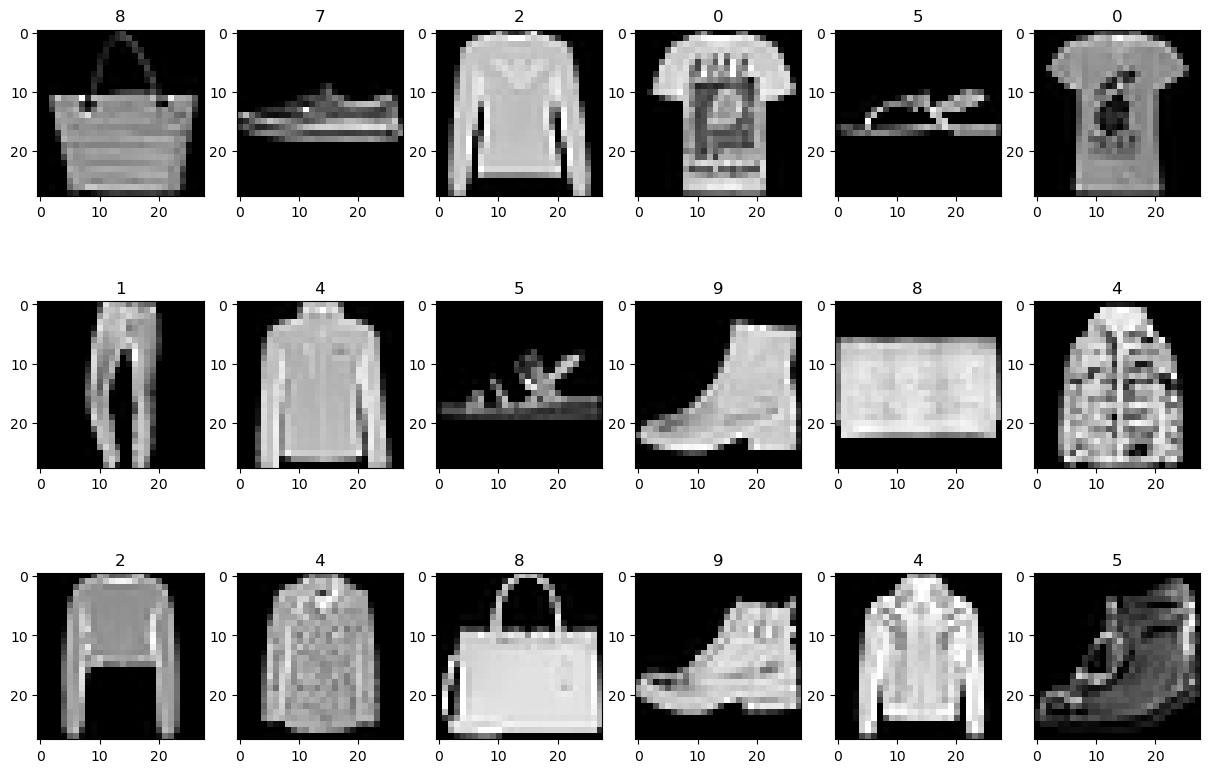

In [56]:
cnt = 1
for r in range(3):
    for c in range(6):
        idx = np.random.randint(len(x_train))
        plt.subplot(3,6,cnt)
        plt.imshow(x_train[idx, ...], cmap='gray')
        plt.title(y_train[idx])
        cnt = cnt + 1

### Building the Classifier

We are now going to build the baseline classifier that you will use throughout this homework.

In [57]:
# Data normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [58]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation='softmax')(net)

model = Model(inputs, outputs)
model.summary()

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,213,002 (12.26 MB)

 Trainable params: 3,213,002 (12.26 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:
epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.8631 - loss: 0.3928 - val_accuracy: 0.8822 - val_loss: 0.3269
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9048 - loss: 0.2664 - val_accuracy: 0.8896 - val_loss: 0.3054
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9191 - loss: 0.2254 - val_accuracy: 0.8925 - val_loss: 0.3034
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9298 - loss: 0.1957 - val_accuracy: 0.8920 - val_loss: 0.3155
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9394 - loss: 0.1714 - val_accuracy: 0.8901 - val_loss: 0.3365
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9461 - loss: 0.1522 - val_accuracy: 0.8893 - val_loss: 0.3619
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9521 - loss: 0.1381 - val_accuracy: 0.8920 - val_loss: 0.3821
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9580 - loss: 0.1220 - 

Train Acc      0.9931666851043701
Validation Acc 0.8815000057220459


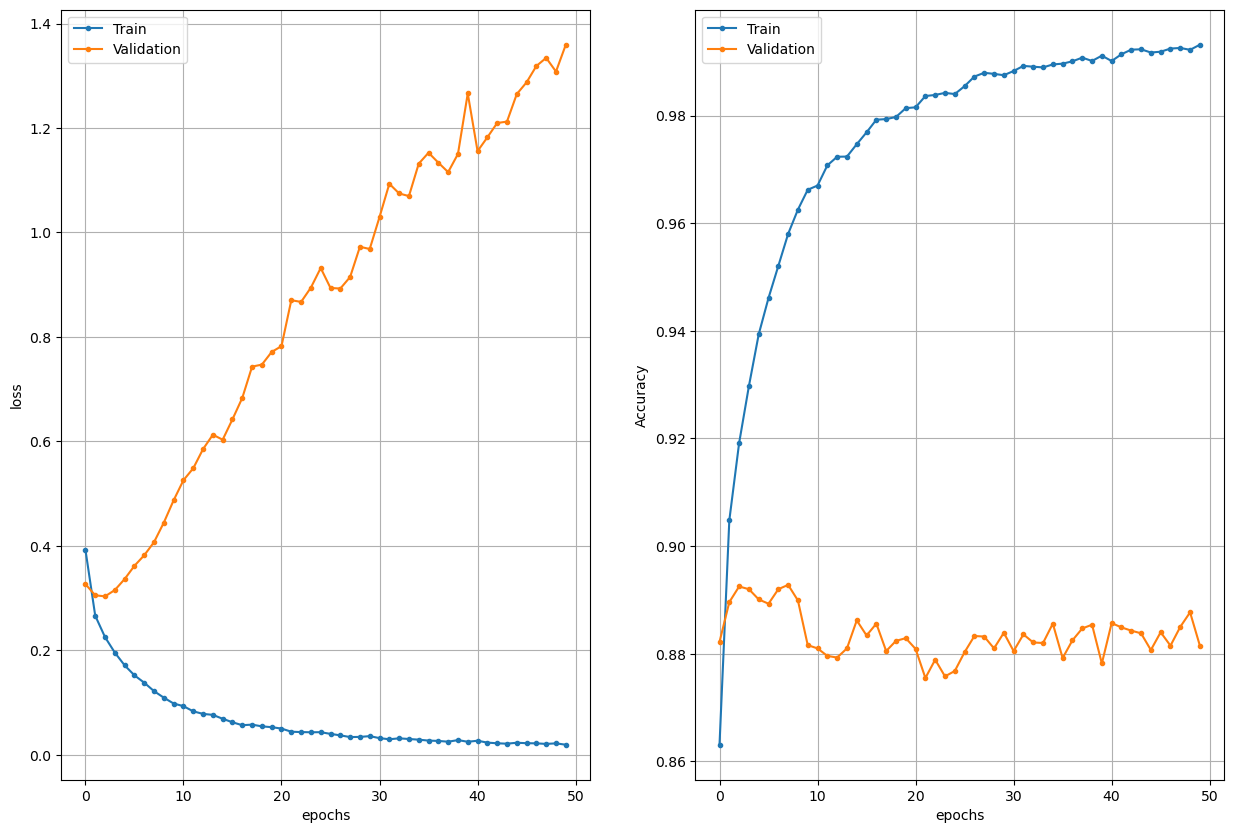

In [60]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])
    
plot_history(history)

As you can see, the classifier suffers from massive overfitting. The validation accuracy is around 88% while the training accuracy is close to 1.

### Combat the Overfitting!

Now it is your turn. Use the classifier as a baseline, include some regularization techniques and try to improve the classification performance. You can try any techniques you might see fit, e.g.,
* Dropout
* Batch normalization
* Weight regularization
* Data augmentation
* Early stopping
* Pooling
* Reducing the number of parameters (the size of the network)
* ...

There are to objective you shall fulfill in order to successfully complete this homework:
* The validation accuracy shall be above 91%
* Your network (with all the regularizations applied) shall **not** be larger than the baseline

In [61]:
# Modify the baseline classifier in order to reduce the overfitting and make the performance more robust
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

x_train = x_train[...,np.newaxis]
x_test = x_test[...,np.newaxis]

inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
net = BatchNormalization()(net)
net = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(net)
net = MaxPooling2D((2,2))(net)
net = Dropout(0.25)(net)

net = Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(net)
net = BatchNormalization()(net)
net = Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(net)
net = MaxPooling2D((2,2))(net)
net = Dropout(0.25)(net)

net = Flatten()(net)
net = Dense(512, activation='relu')(net)
net = BatchNormalization()(net)
net = Dropout(0.5)(net)

outputs = Dense(num_classes, activation='softmax')(net)

model = Model(inputs, outputs)
model.summary()

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 512)            │     1,606,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,678,698 (6.40 MB)

 Trainable params: 1,677,482 (6.40 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [62]:
# Train the network
datagen = ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,
                             zoom_range=0.1,shear_range=0.1,fill_mode='nearest')

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='accuracy', patience=7, restore_best_weights=True, verbose=1)

epochs = 100
batch_size = 128

history = model.fit(datagen.flow(x_train,y_train,batch_size=batch_size),
                    steps_per_epoch=len(x_train)//batch_size,
                    validation_data=(x_test, y_test),
                    epochs=epochs,
                    callbacks=[early_stop],
                    verbose=2)

Epoch 1/100
468/468 - 24s - 52ms/step - accuracy: 0.7533 - loss: 0.6874 - val_accuracy: 0.6402 - val_loss: 1.0801
Epoch 2/100
468/468 - 1s - 3ms/step - accuracy: 0.8516 - loss: 0.3822 - val_accuracy: 0.6375 - val_loss: 1.0626
Epoch 3/100
468/468 - 24s - 51ms/step - accuracy: 0.8297 - loss: 0.4614 - val_accuracy: 0.8750 - val_loss: 0.3452
Epoch 4/100
468/468 - 1s - 3ms/step - accuracy: 0.8359 - loss: 0.5364 - val_accuracy: 0.8766 - val_loss: 0.3425
Epoch 5/100
468/468 - 25s - 54ms/step - accuracy: 0.8515 - loss: 0.4020 - val_accuracy: 0.8890 - val_loss: 0.3013
Epoch 6/100
468/468 - 1s - 3ms/step - accuracy: 0.8750 - loss: 0.4591 - val_accuracy: 0.8909 - val_loss: 0.2989
Epoch 7/100
468/468 - 25s - 53ms/step - accuracy: 0.8638 - loss: 0.3684 - val_accuracy: 0.8807 - val_loss: 0.3143
Epoch 8/100
468/468 - 1s - 3ms/step - accuracy: 0.8750 - loss: 0.3526 - val_accuracy: 0.8875 - val_loss: 0.3010
Epoch 9/100
468/468 - 25s - 54ms/step - accuracy: 0.8737 - loss: 0.3437 - val_accuracy: 0.8816 -

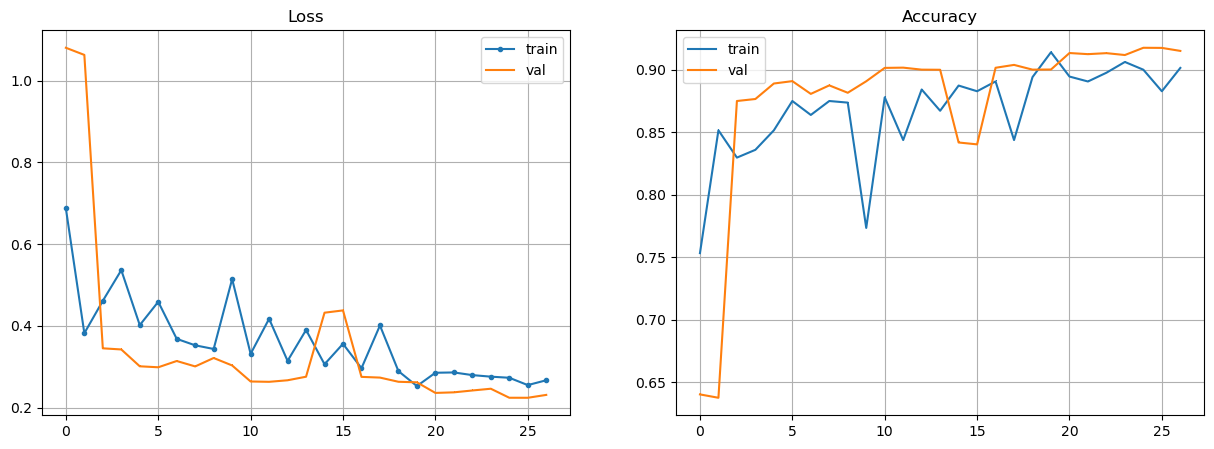

Best validation accuracy: 0.9176


In [65]:
# Show the results
def plot_history(hist):
    h = hist.history
    ep = range(len(h['loss']))
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(ep, h['loss'], '.-', label='train')
    plt.plot(ep, h['val_loss'], ',-', label='val')
    plt.title('Loss'), plt.grid(True), plt.legend()

    plt.subplot(1,2,2)
    plt.plot(ep, h['accuracy'], ',-', label='train')
    plt.plot(ep, h['val_accuracy'], ',-', label='val')
    plt.title('Accuracy'), plt.grid(True), plt.legend()
    plt.show()

    print(f"Best validation accuracy: {max(h['val_accuracy']):.4f}")

plot_history(history)

### Questions

* What have you done in order to improve the performance?
  A: Improved: added two convolutional blocks; MaxPooling after each conv block; difference in rotation, shift, zoom, and shear; set patience to 7 in EarlyStopping;
* Have you tried configurations that did not work out?
  A: Three conv blocks with 128 filters; missused "keras"; errors in amount of data in 3d and 4d; to much pooling.